In [1]:
import json
import os
import numpy as np

In [176]:
jsons_path='./jsons'
json_file='01_01_F038_12.json'
with open(os.path.join(jsons_path,json_file), 'r', encoding='utf-8') as f:
    data = json.load(f)
labels=[]
for label in data['labelingInfo']:
    labels.append(label['polygon'])

In [177]:
type(data['labelingInfo'][0]['polygon'])

dict

In [178]:
data['labelingInfo']

[{'polygon': {'color': '#1beaac',
   'location': '1027 545 960 564 917 612 902 686 894 733 909 788 945 792 976 800 1000 851 1105 804 1094 749 1121 670 1121 596 1074 553 1027 545 ',
   'label': '머리',
   'type': 'polygon'}},
 {'polygon': {'color': '#27b73c',
   'location': '1035 1893 1078 1889 1141 1874 1160 1925 1176 2003 1180 2082 1172 2156 1172 2238 1172 2262 1086 2266 1090 2223 1074 2121 1058 2023 1051 1948 1035 1893 ',
   'label': '아래왼쪽다리',
   'type': 'polygon'}},
 {'polygon': {'color': '#56bcec',
   'location': '913 2344 917 2376 968 2403 1019 2403 1105 2399 1180 2383 1196 2360 1188 2317 1176 2274 1082 2274 1070 2289 1031 2309 976 2328 913 2344 ',
   'label': '왼발',
   'type': 'polygon'}}]

In [196]:
for i in range(len(data['labelingInfo'])):
    if data['labelingInfo'][i]['polygon']['label']=='머리':
        head=data['labelingInfo'][i]['polygon']['location']
    elif '발' in data['labelingInfo'][i]['polygon']['label']:
        foot=data['labelingInfo'][i]['polygon']['location']
    elif '몸' in data['labelingInfo'][i]['polygon']['label']:
        body=data['labelingInfo'][i]['polygon']['location']
body

'880 1098 932 1097 984 1095 1001 1106 1049 1123 1074 1131 1098 1135 1124 1147 1134 1157 1108 1224 1098 1258 1092 1299 1091 1328 1096 1365 1093 1399 1090 1423 1084 1458 1084 1485 1089 1508 1088 1525 1071 1523 1006 1531 941 1536 859 1530 831 1533 832 1516 841 1482 828 1431 821 1397 815 1385 818 1331 813 1299 791 1243 749 1166 771 1149 785 1142 801 1141 858 1115 880 1098 '

In [180]:
head.strip().split(' ')
head_x=[]
head_y=[]
odd=False
for xy in head.strip().split(' '):
    if odd:
        head_y.append(xy)
        odd=False
    else:
        odd=True
foot_y=[]
odd=False
for xy in foot.strip().split(' '):
    if odd:
        foot_y.append(xy)
        odd=False
    else:
        odd=True
odd=False
body_x=[]
body_y=[]
for xy in body.strip().split(' '):
    if odd:
        body_y.append(xy)
        odd=False
    else:
        body_x.append(xy)
        odd=True

In [181]:
max(head_y)

'851'

In [182]:
min(foot_y)

'2274'

In [183]:
data['labelingInfo']

[{'polygon': {'color': '#1beaac',
   'location': '1027 545 960 564 917 612 902 686 894 733 909 788 945 792 976 800 1000 851 1105 804 1094 749 1121 670 1121 596 1074 553 1027 545 ',
   'label': '머리',
   'type': 'polygon'}},
 {'polygon': {'color': '#27b73c',
   'location': '1035 1893 1078 1889 1141 1874 1160 1925 1176 2003 1180 2082 1172 2156 1172 2238 1172 2262 1086 2266 1090 2223 1074 2121 1058 2023 1051 1948 1035 1893 ',
   'label': '아래왼쪽다리',
   'type': 'polygon'}},
 {'polygon': {'color': '#56bcec',
   'location': '913 2344 917 2376 968 2403 1019 2403 1105 2399 1180 2383 1196 2360 1188 2317 1176 2274 1082 2274 1070 2289 1031 2309 976 2328 913 2344 ',
   'label': '왼발',
   'type': 'polygon'}}]

In [184]:
body_x

['880',
 '932',
 '984',
 '1001',
 '1049',
 '1074',
 '1098',
 '1124',
 '1134',
 '1108',
 '1098',
 '1092',
 '1091',
 '1096',
 '1093',
 '1090',
 '1084',
 '1084',
 '1089',
 '1088',
 '1071',
 '1006',
 '941',
 '859',
 '831',
 '832',
 '841',
 '828',
 '821',
 '815',
 '818',
 '813',
 '791',
 '749',
 '771',
 '785',
 '801',
 '858',
 '880']

In [185]:
height=1400
body_y_diff=[abs(height-int(y)) for y in body_y]

In [186]:
a=100
b=100
for diff in body_y_diff:
    if diff<a:
        if diff<b:
            a=b
            b=diff
        else:
            a=diff
print(a, b)

3 1


In [187]:
body_y_diff.index(b)

14

In [188]:
len(body_y_diff)

39

In [189]:
body_y_diff

[302,
 303,
 305,
 294,
 277,
 269,
 265,
 253,
 243,
 176,
 142,
 101,
 72,
 35,
 1,
 23,
 58,
 85,
 108,
 125,
 123,
 131,
 136,
 130,
 133,
 116,
 82,
 31,
 3,
 15,
 69,
 101,
 157,
 234,
 251,
 258,
 259,
 285,
 302]

In [190]:
pHeight=176
cmPerPixel=176/(int(max(foot_y))-int(min(head_y)))
cmPerPixel

0.09472551130247578

In [191]:
depthPixel=abs(int(body_x[body_y_diff.index(a)])-int(body_x[body_y_diff.index(b)]))
depthPixel

272

In [192]:
depthcm=depthPixel*cmPerPixel
depthcm

25.765339074273413

In [193]:
int(max(foot_y))-int(min(head_y))

1858

In [194]:
w=[]
for i in range(len(body_x)):
    w.append((int(body_x[i]), int(body_y[i])))

In [195]:
w

[(880, 1098),
 (932, 1097),
 (984, 1095),
 (1001, 1106),
 (1049, 1123),
 (1074, 1131),
 (1098, 1135),
 (1124, 1147),
 (1134, 1157),
 (1108, 1224),
 (1098, 1258),
 (1092, 1299),
 (1091, 1328),
 (1096, 1365),
 (1093, 1399),
 (1090, 1423),
 (1084, 1458),
 (1084, 1485),
 (1089, 1508),
 (1088, 1525),
 (1071, 1523),
 (1006, 1531),
 (941, 1536),
 (859, 1530),
 (831, 1533),
 (832, 1516),
 (841, 1482),
 (828, 1431),
 (821, 1397),
 (815, 1385),
 (818, 1331),
 (813, 1299),
 (791, 1243),
 (749, 1166),
 (771, 1149),
 (785, 1142),
 (801, 1141),
 (858, 1115),
 (880, 1098)]

In [160]:
print(body_x[body_y_diff.index(a)],body_x[body_y_diff.index(b)])

749 1108


In [162]:
from matplotlib import pyplot as plt
import numpy as np

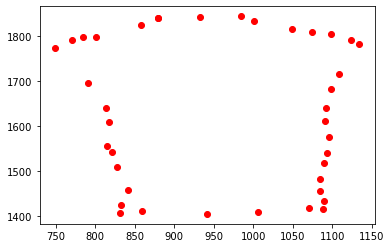

In [200]:
for i in range(len(body_x)):
    plt.plot(int(body_x[i]), 2940-int(body_y[i]), 'or')
plt.show()

In [2]:
import xml.etree.ElementTree as ET

In [6]:
tree=ET.parse('./xml/expose.xml')

In [4]:
import exposal as E

In [5]:
expose=E.getExposal('CHEST', 'PA')
expose

{'kvp': 120, 'ma': 320, 'msec': 12.0, 'mas': 3.84}

In [7]:
tree

In [8]:
keys=expose.keys()
keys

dict_keys(['kvp', 'ma', 'msec', 'mas'])

In [10]:
values=expose.values()
values

dict_values([120, 320, 12.0, 3.84])

In [12]:
root=tree.getroot()
root

<Element 'expose' at 0x0000021ECA7B97C0>

In [16]:
root.find('kvp').text='100'
root.find('kvp').text

'100'

In [17]:
tree.findtext('kvp')

'100'

In [18]:
root.findtext('ma')

'300'

In [19]:
tree.write('./xml/expose.xml')

In [21]:
a=True
not a

False